In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
folder = '2021-05-27'
data = pd.read_csv("data_{}.csv".format(folder)).drop(columns=['Unnamed: 0'])
data['Czas'] = pd.to_datetime(data['Czas'])
data.set_index('Czas')
data.columns

Index(['Czas', 'Powietrze_dystrybucyjne', 'Zawartosc_tlenu', 'Predkosc_dmuchu',
       'Nadawa_pylow', 'Strata_laczna', 'Strata_pasa', 'S600', 'S500', 'S300',
       'S100', 'Nadawa_koncentratu', 'Nadawa_1', 'Nadawa_2', 'Tlen_lanca',
       'Tlen_procesowe', 'Powietrze_procesowe', 'Przetlenienie',
       'Zawartosc_wegla', 'Zawartosc_siarki', 'Udzial_nadziarna',
       'Udzial_podziarna', 'Poziom_topu', 'Kat_dystrybucji',
       'Straty_odstojnika', 'Temperatura_zuzla', 'Drgania_kotla'],
      dtype='object')

In [3]:
df = data.resample('60s', on='Czas').mean()
df

,Powietrze_dystrybucyjne,Zawartosc_tlenu,Predkosc_dmuchu,Nadawa_pylow,Strata_laczna,Strata_pasa,S600,S500,S300,S100,...,Przetlenienie,Zawartosc_wegla,Zawartosc_siarki,Udzial_nadziarna,Udzial_podziarna,Poziom_topu,Kat_dystrybucji,Straty_odstojnika,Temperatura_zuzla,Drgania_kotla
Czas,,,,,,,,,,,,,,,,,,,,,
2021-05-24 06:50:00,2700.000000,72.0,44.0,22.0,23.209151,1.104459,2.068237,6.588270,7.046076,6.424392,...,306.0,8.96,11.02,3.04,60.299999,1270.0,13.633515,10.080954,1304.0,-1.825819
2021-05-24 06:51:00,2700.000000,72.0,44.0,22.0,23.074187,1.099283,2.049822,6.511796,7.004291,6.428227,...,306.0,8.96,11.02,3.04,60.299999,1270.0,13.729558,10.055165,1304.0,-1.639433
2021-05-24 06:52:00,2700.000000,72.0,44.0,22.0,22.957379,1.093975,2.036343,6.447149,6.958589,6.431061,...,306.0,8.96,11.02,3.04,60.299999,1270.0,13.775435,10.037103,1304.0,-1.934138
2021-05-24 06:53:00,3213.333333,72.0,44.0,22.0,22.854870,1.088667,2.024094,6.395628,6.921642,6.433411,...,306.0,8.96,11.02,3.04,60.299999,1270.0,16.860701,10.056675,1304.0,-1.845449
2021-05-24 06:54:00,3500.000000,72.0,44.0,22.0,22.748606,1.083330,2.012154,6.332479,6.889519,6.435773,...,306.0,8.96,11.02,3.04,60.300000,1270.0,21.455055,10.082321,1304.0,-1.670158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-06 22:45:00,3395.833333,72.0,50.0,24.0,17.762617,0.866302,1.477614,4.149750,5.316603,5.968817,...,276.0,8.81,10.18,3.32,59.400002,1180.0,22.040710,10.115715,1301.0,0.611314
2021-06-06 22:46:00,3000.000000,72.0,50.0,24.0,17.744945,0.863295,1.473285,4.136156,5.319176,5.963677,...,276.0,8.81,10.18,3.32,59.400002,1180.0,17.075416,10.118410,1301.0,0.421282
2021-06-06 22:47:00,3000.000000,72.0,50.0,24.0,17.708579,0.860287,1.468956,4.124658,5.310301,5.966313,...,276.0,8.81,10.18,3.32,59.400002,1180.0,16.925660,10.128546,1301.0,0.492289


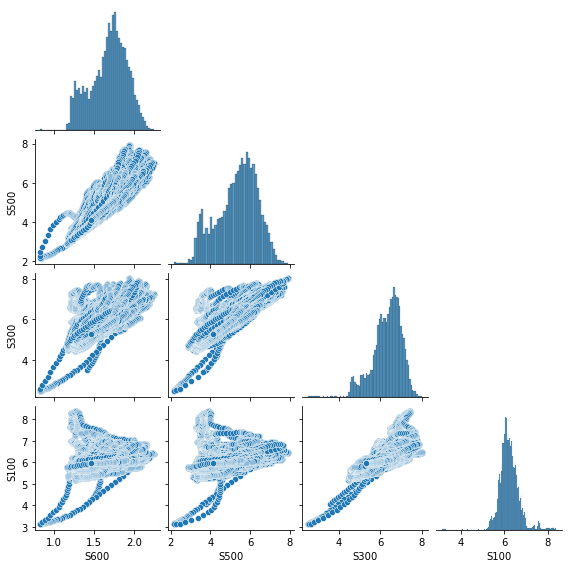

In [4]:
sns.pairplot(df[['S600', 'S500', 'S300','S100']], corner=True, height=2)

In [5]:
df[['S600', 'S500', 'S300','S100']].corr()

,S600,S500,S300,S100
S600,1.000000,0.907800,0.678460,0.081346
S500,0.907800,1.000000,0.797506,0.150593
S300,0.678460,0.797506,1.000000,0.690048
S100,0.081346,0.150593,0.690048,1.000000


In [6]:
#sns.pairplot(data.head(100))

In [7]:
x = data['Powietrze_dystrybucyjne']
#x = data['Zawartosc_tlenu']
#x = data['Predkosc_dmuchu']


y = data['Strata_laczna']

<AxesSubplot:>

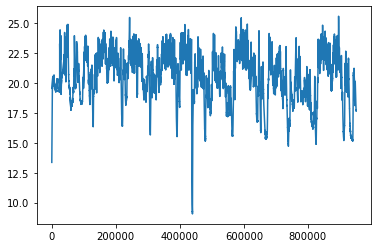

In [8]:
y.plot()

In [9]:
def rfft_xcorr(x, y):
    M = len(x) + len(y) - 1
    N = 2 ** int(np.ceil(np.log2(M)))
    X = np.fft.rfft(x, N)
    Y = np.fft.rfft(y, N)
    cxy = np.fft.irfft(X * np.conj(Y))
    cxy = np.hstack((cxy[:len(x)], cxy[N-len(y)+1:]))
    return cxy

def match(x, ref):
    cxy = rfft_xcorr(x, ref)
    index = np.argmax(cxy)
    if index < len(x):
        return index
    else: # negative lag
        return index - len(cxy) 

In [10]:
match(x, y)

-1015

Text(0, 0.5, 'Sprzężenie FFT Powietrzedystrybucyjne i Strata')

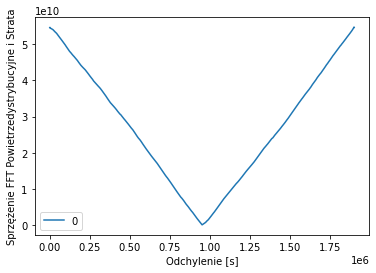

In [11]:
pd.DataFrame(rfft_xcorr(x,y)).plot()
plt.xlabel('Odchylenie [s]')
plt.ylabel('Sprzężenie FFT Powietrzedystrybucyjne i Strata')

<AxesSubplot:>

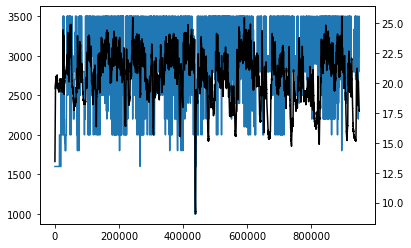

In [12]:
df = data[['Powietrze_dystrybucyjne', 'Strata_laczna']]

ax1 = df['Powietrze_dystrybucyjne'].plot()

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df['Strata_laczna'].shift(-17).plot(ax=ax2, color='k')
